In [1]:
from pathlib import Path

notebook_path = Path().cwd().parent.parent.parent.parent
import sys

sys.path.insert(0, str(notebook_path))

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from explore.gcp.storage import gcp
from explore.src.visualisation.exploratory_visuals import StatisticPlots
from explore.src.visualisation.stats_visual import StatsVisuals

import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
%load_ext autoreload
%autoreload 2 

In [2]:
df = gcp.read_df_from_bucket(bucket_name="processed_fbref_db", blob_name="processed_misc.csv")

[03/21/24 18:37:17] INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:28 ] - Getting GCP bucket                                 ]8;id=533357;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=583831;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#28\28]8;;\

                    INFO     explore.gcp.storage - [ MainThread:get_gcp_bucket:33 ] - GCP bucket retrieved                               ]8;id=924753;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py\storage.py]8;;\:]8;id=281466;file:///Users/conal/Projects/fpl_app/exploration/explore/gcp/storage.py#33\33]8;;\

In [3]:
df.head()

rk               player nation    pos           squad            comp  \
0   1  Patrick van Aanholt    NED     DF  Crystal Palace  Premier League   
1   2       Rolando Aarons    ENG  MF,FW   Newcastle Utd  Premier League   
2   3       Rolando Aarons    ENG  MF,FW   Hellas Verona         Serie A   
3   4        Ignazio Abate    ITA     DF           Milan         Serie A   
4   5      Aymen Abdennour    TUN     DF       Marseille         Ligue 1   

    age    born   90s  yellow_cards  red_cards  second_yellow_cards  fouls  \
0  26.0  1990.0  24.3             7          0                  0.0     18   
1  21.0  1995.0   1.5             0          0                  0.0      1   
2  21.0  1995.0   5.7             0          0                  0.0      9   
3  30.0  1986.0  11.7             3          0                  0.0     12   
4  27.0  1989.0   5.5             3          0                  0.0      9   

   fouls_drawn  offsides  crosses  interceptions  tackles_won  penalties_won  \
0         10.0       3.0     56.0           47.0         32.0            0.0   
1          3.0       1.0      2.0            1.0          4.0            0.0   
2         11.0       0.0     10.0            2.0          8.0            0.0   
3          8.0       3.0     31.0            8.0         17.0            0.0   
4          6.0       0.0      0.0            4.0          3.0            0.0   

   penalties_conceded  own_goals  ball_recoveries  aerials_won  aerials_lost  \
0                 0.0        0.0            162.0          6.0           5.0   
1                 0.0        0.0              9.0          1.0           3.0   
2                 0.0        0.0             19.0          9.0          15.0   
3                 0.0        0.0             56.0          5.0           4.0   
4                 0.0        0.0             32.0          7.0           7.0   

   aerials_won_pct     season general_pos age_range      country continent  \
0             54.5  2017-2018    Defender     25-29  Netherlands    Europe   
1             25.0  2017-2018  Midfielder     20-24      England    Europe   
2             37.5  2017-2018  Midfielder     20-24      England    Europe   
3             55.6  2017-2018    Defender     30-34        Italy    Europe   
4             50.0  2017-2018    Defender     25-29      Tunisia    Africa   

   player_id  
0          1  
1          2  
2          2  
3          3  
4          4

In [4]:
df.head()

rk               player nation    pos           squad            comp  \
0   1  Patrick van Aanholt    NED     DF  Crystal Palace  Premier League   
1   2       Rolando Aarons    ENG  MF,FW   Newcastle Utd  Premier League   
2   3       Rolando Aarons    ENG  MF,FW   Hellas Verona         Serie A   
3   4        Ignazio Abate    ITA     DF           Milan         Serie A   
4   5      Aymen Abdennour    TUN     DF       Marseille         Ligue 1   

    age    born   90s  yellow_cards  red_cards  second_yellow_cards  fouls  \
0  26.0  1990.0  24.3             7          0                  0.0     18   
1  21.0  1995.0   1.5             0          0                  0.0      1   
2  21.0  1995.0   5.7             0          0                  0.0      9   
3  30.0  1986.0  11.7             3          0                  0.0     12   
4  27.0  1989.0   5.5             3          0                  0.0      9   

   fouls_drawn  offsides  crosses  interceptions  tackles_won  penalties_won  \
0         10.0       3.0     56.0           47.0         32.0            0.0   
1          3.0       1.0      2.0            1.0          4.0            0.0   
2         11.0       0.0     10.0            2.0          8.0            0.0   
3          8.0       3.0     31.0            8.0         17.0            0.0   
4          6.0       0.0      0.0            4.0          3.0            0.0   

   penalties_conceded  own_goals  ball_recoveries  aerials_won  aerials_lost  \
0                 0.0        0.0            162.0          6.0           5.0   
1                 0.0        0.0              9.0          1.0           3.0   
2                 0.0        0.0             19.0          9.0          15.0   
3                 0.0        0.0             56.0          5.0           4.0   
4                 0.0        0.0             32.0          7.0           7.0   

   aerials_won_pct     season general_pos age_range      country continent  \
0             54.5  2017-2018    Defender     25-29  Netherlands    Europe   
1             25.0  2017-2018  Midfielder     20-24      England    Europe   
2             37.5  2017-2018  Midfielder     20-24      England    Europe   
3             55.6  2017-2018    Defender     30-34        Italy    Europe   
4             50.0  2017-2018    Defender     25-29      Tunisia    Africa   

   player_id  
0          1  
1          2  
2          2  
3          3  
4          4

In [5]:
df.shape

(19122, 31)

## Statistical Plots

In [6]:
stat_plots = StatisticPlots(df)

In [7]:
cols = df.columns[9:-6]
cols

Index(['yellow_cards', 'red_cards', 'second_yellow_cards', 'fouls',
       'fouls_drawn', 'offsides', 'crosses', 'interceptions', 'tackles_won',
       'penalties_won', 'penalties_conceded', 'own_goals', 'ball_recoveries',
       'aerials_won', 'aerials_lost', 'aerials_won_pct'],
      dtype='object')

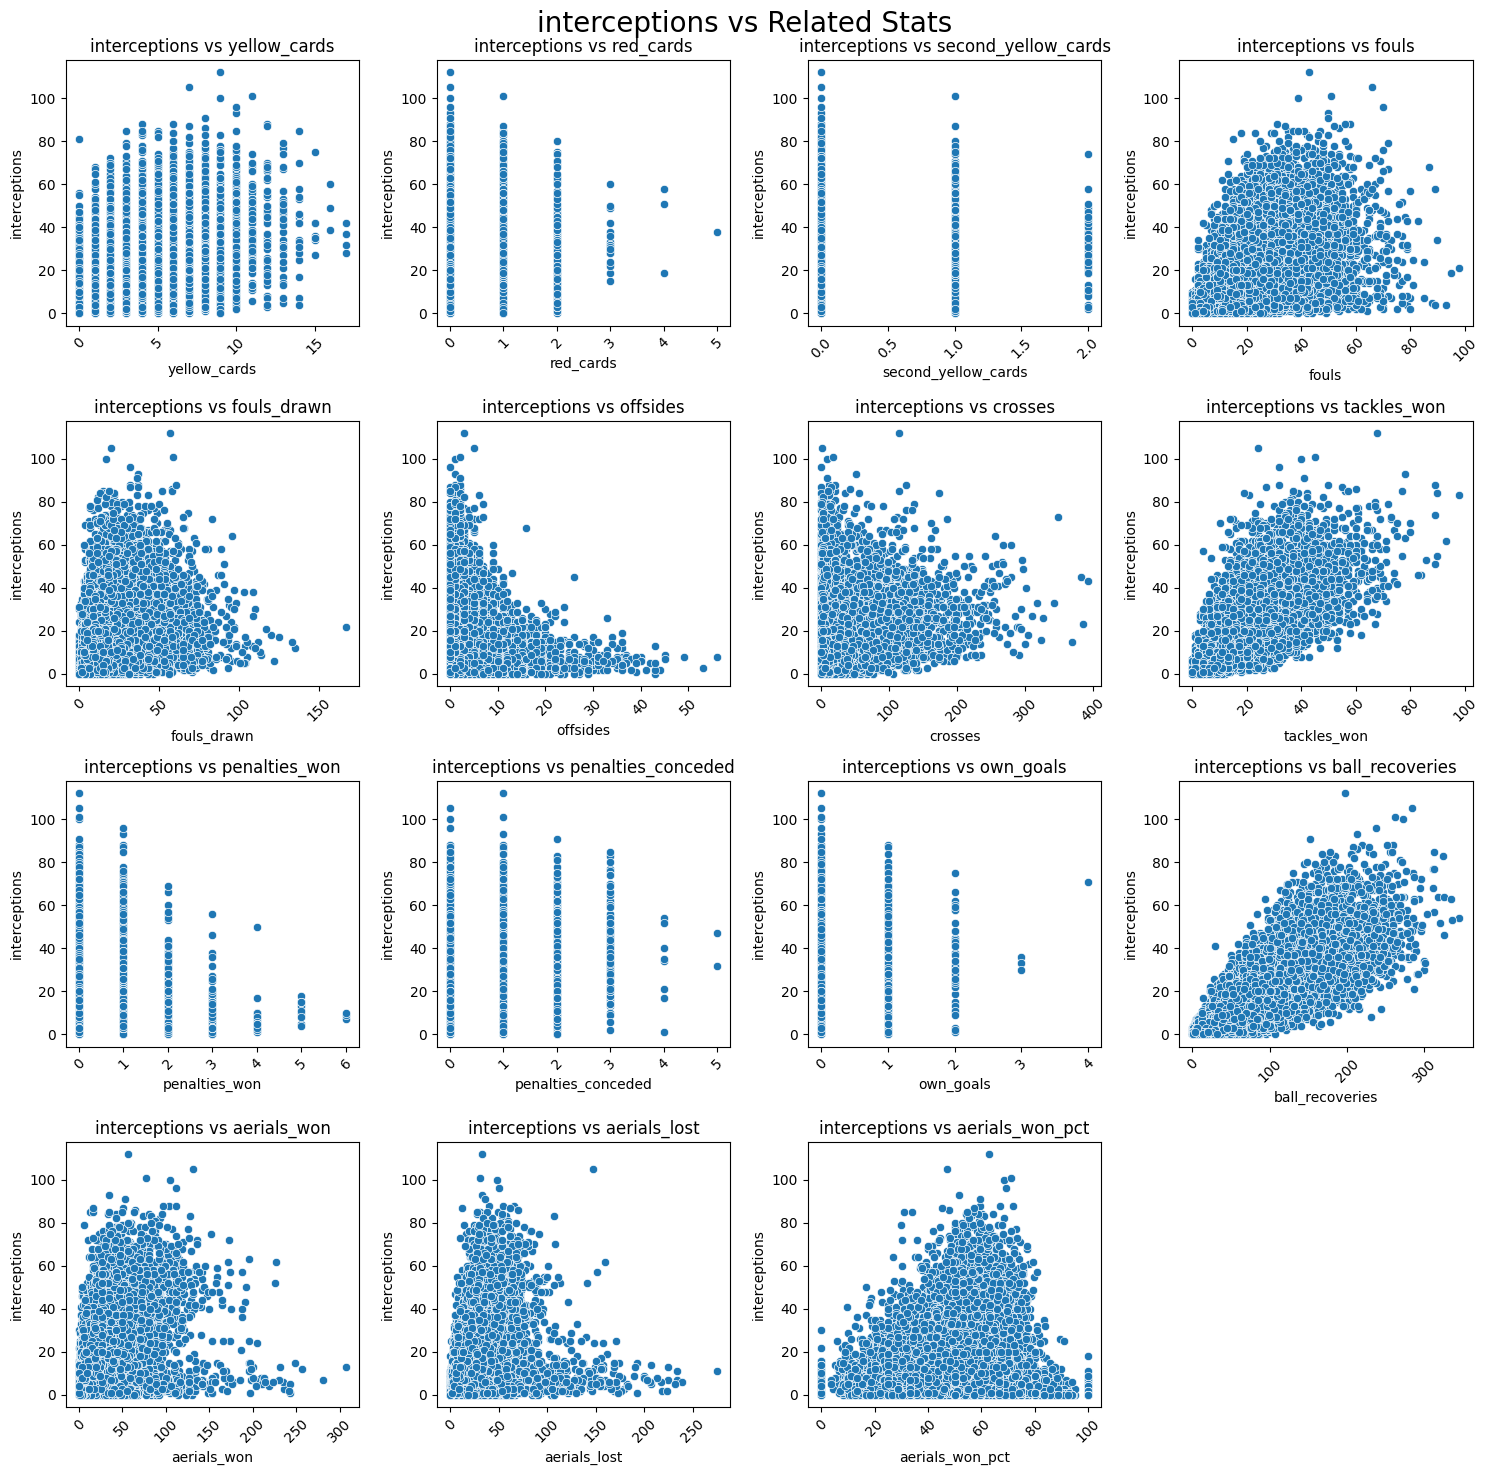

In [8]:
stat_plots.relationships(y='interceptions', X=cols)

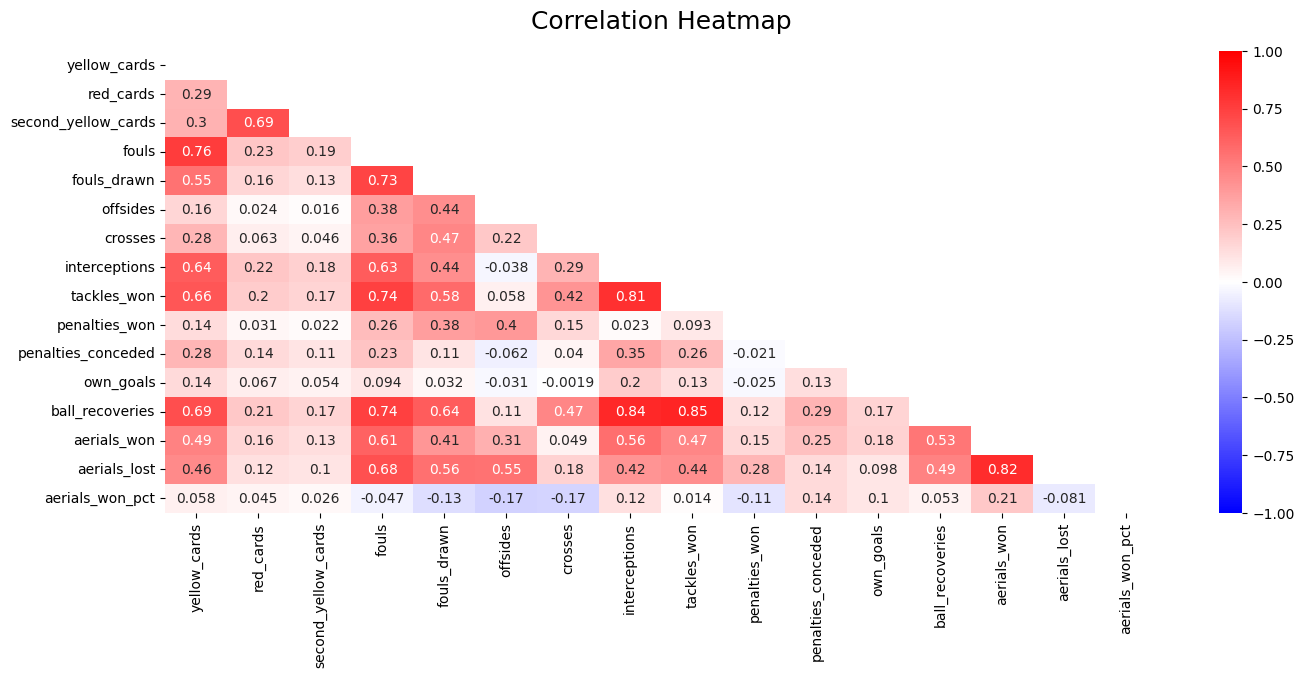

In [9]:
stat_plots.correlation_matrix(cols)

In [10]:
# remove 2023-24 season
dff = df[df['season'] != '2023-2024']
df_season_2324 = df[df['season'] == '2023-2024']

In [11]:
misc_visuals = StatsVisuals(dff)

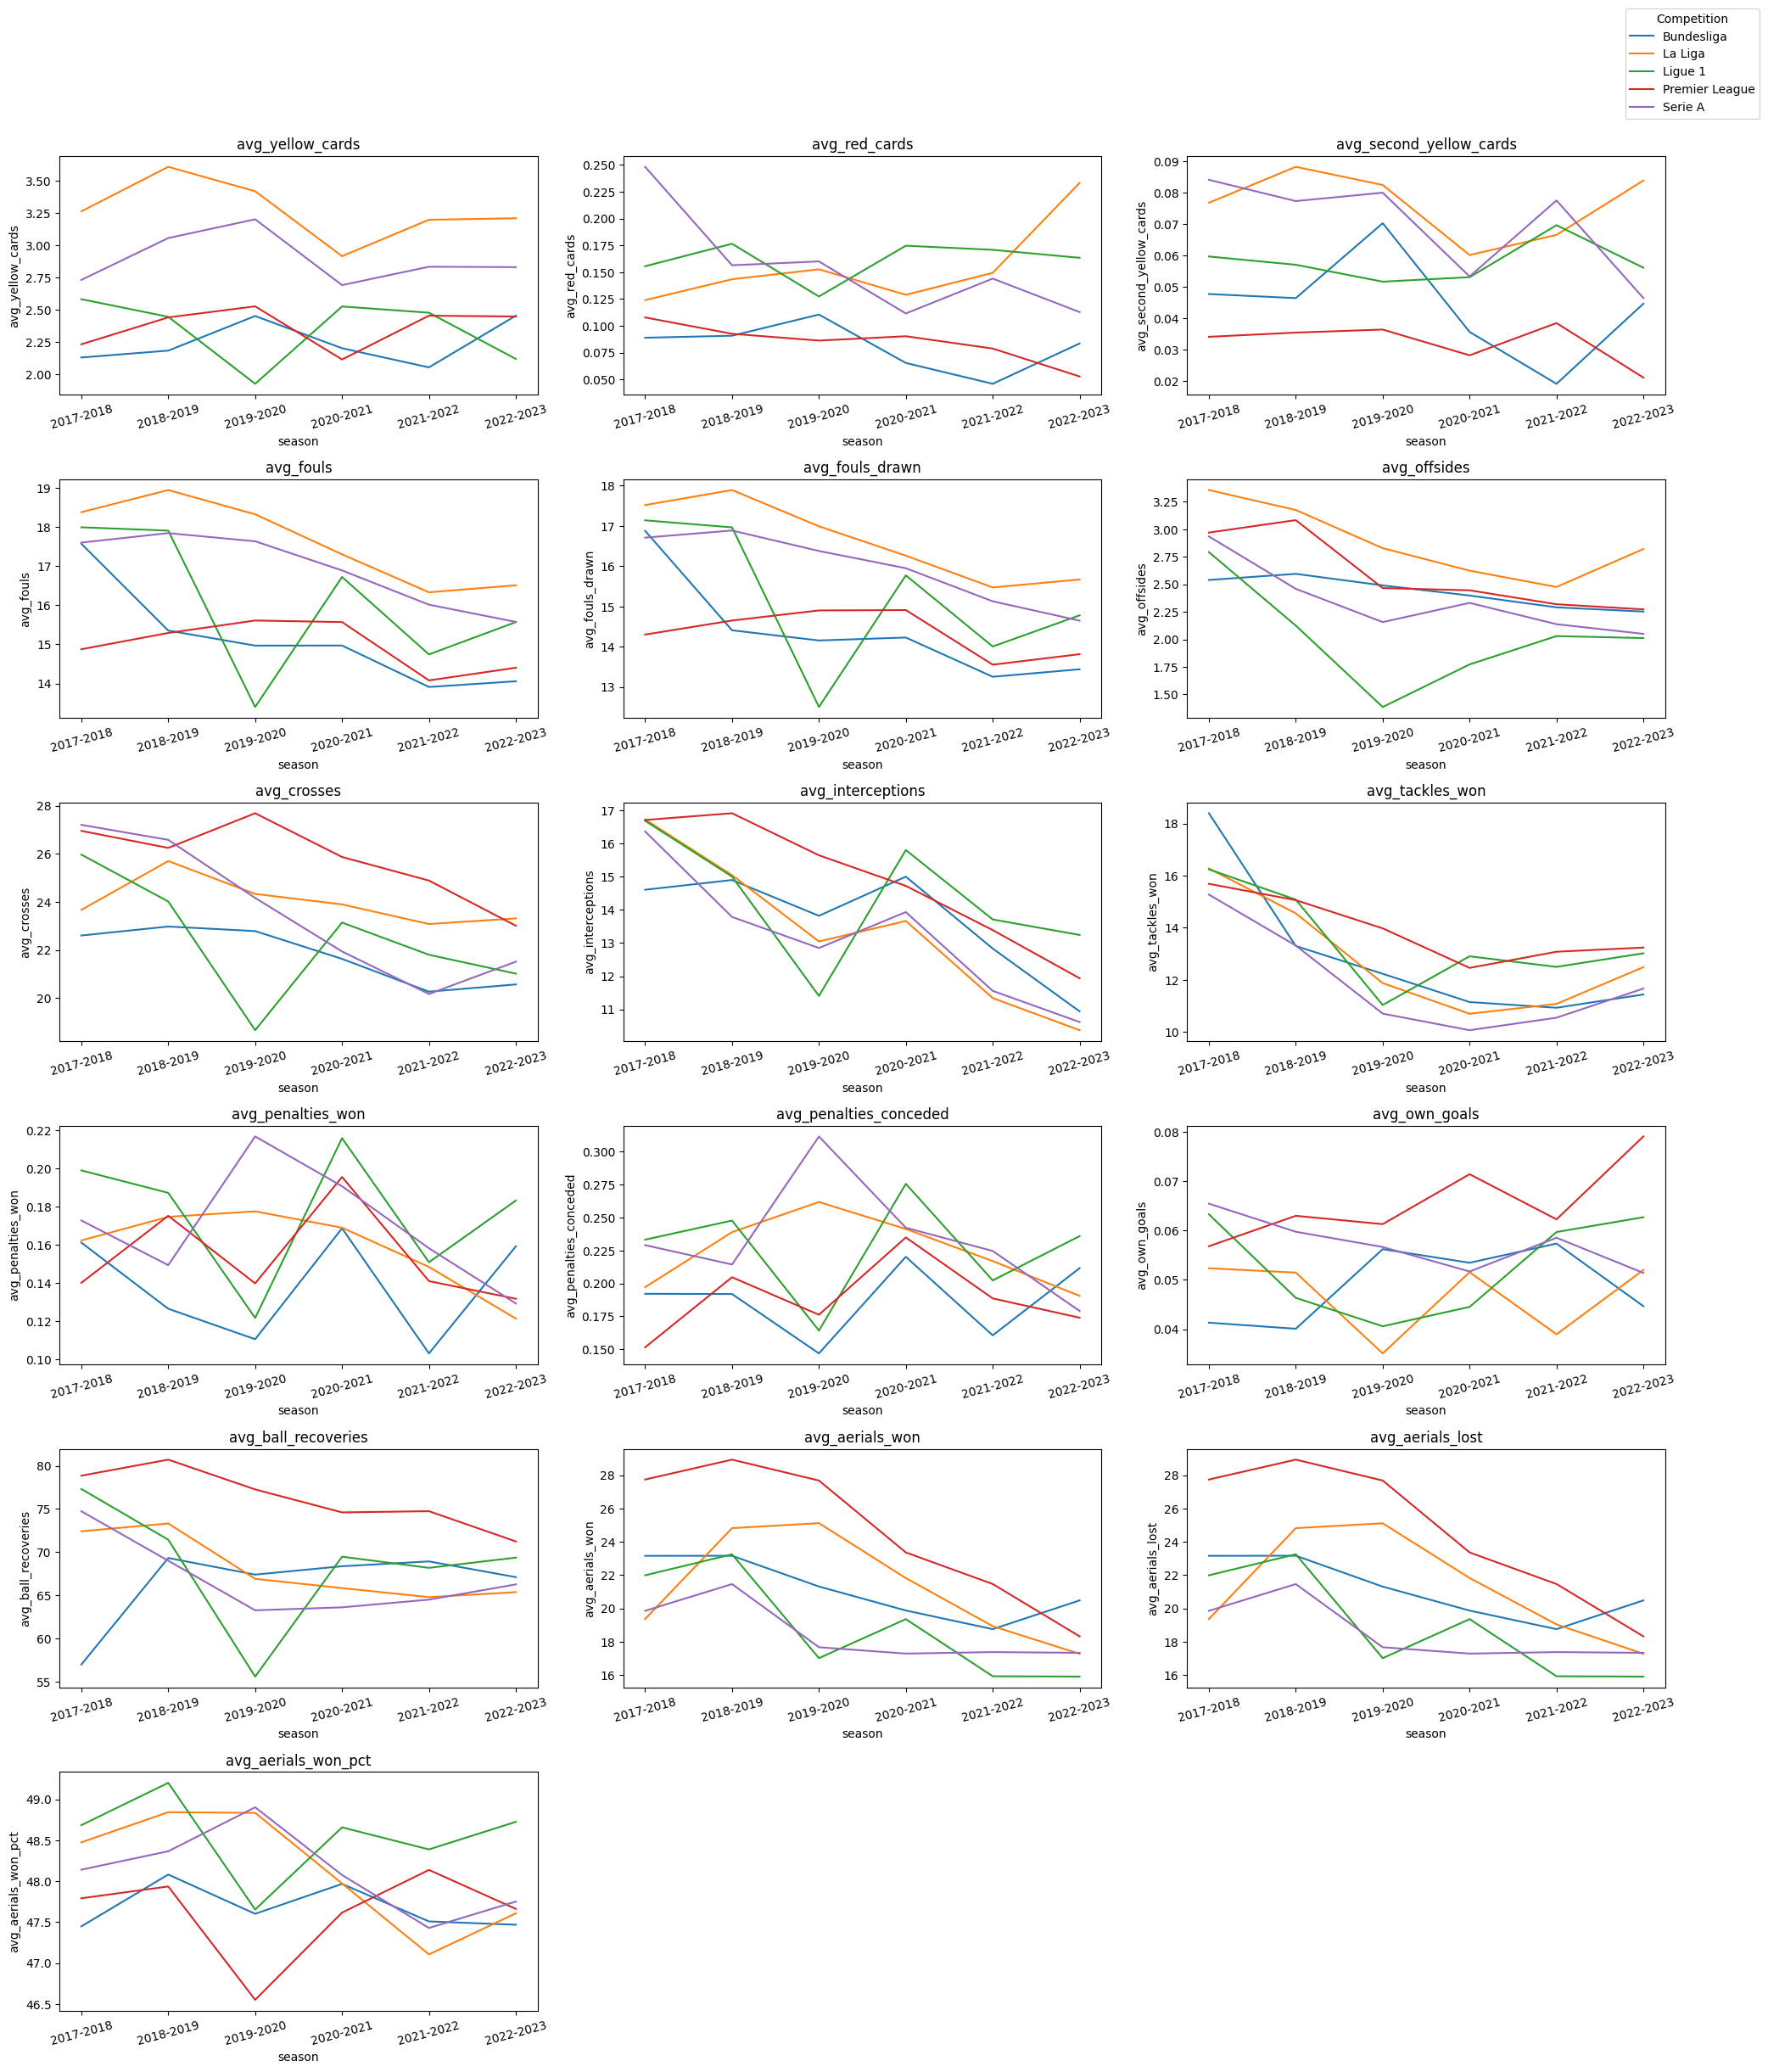

In [12]:
misc_visuals.avgs_time_series('comp', cols)

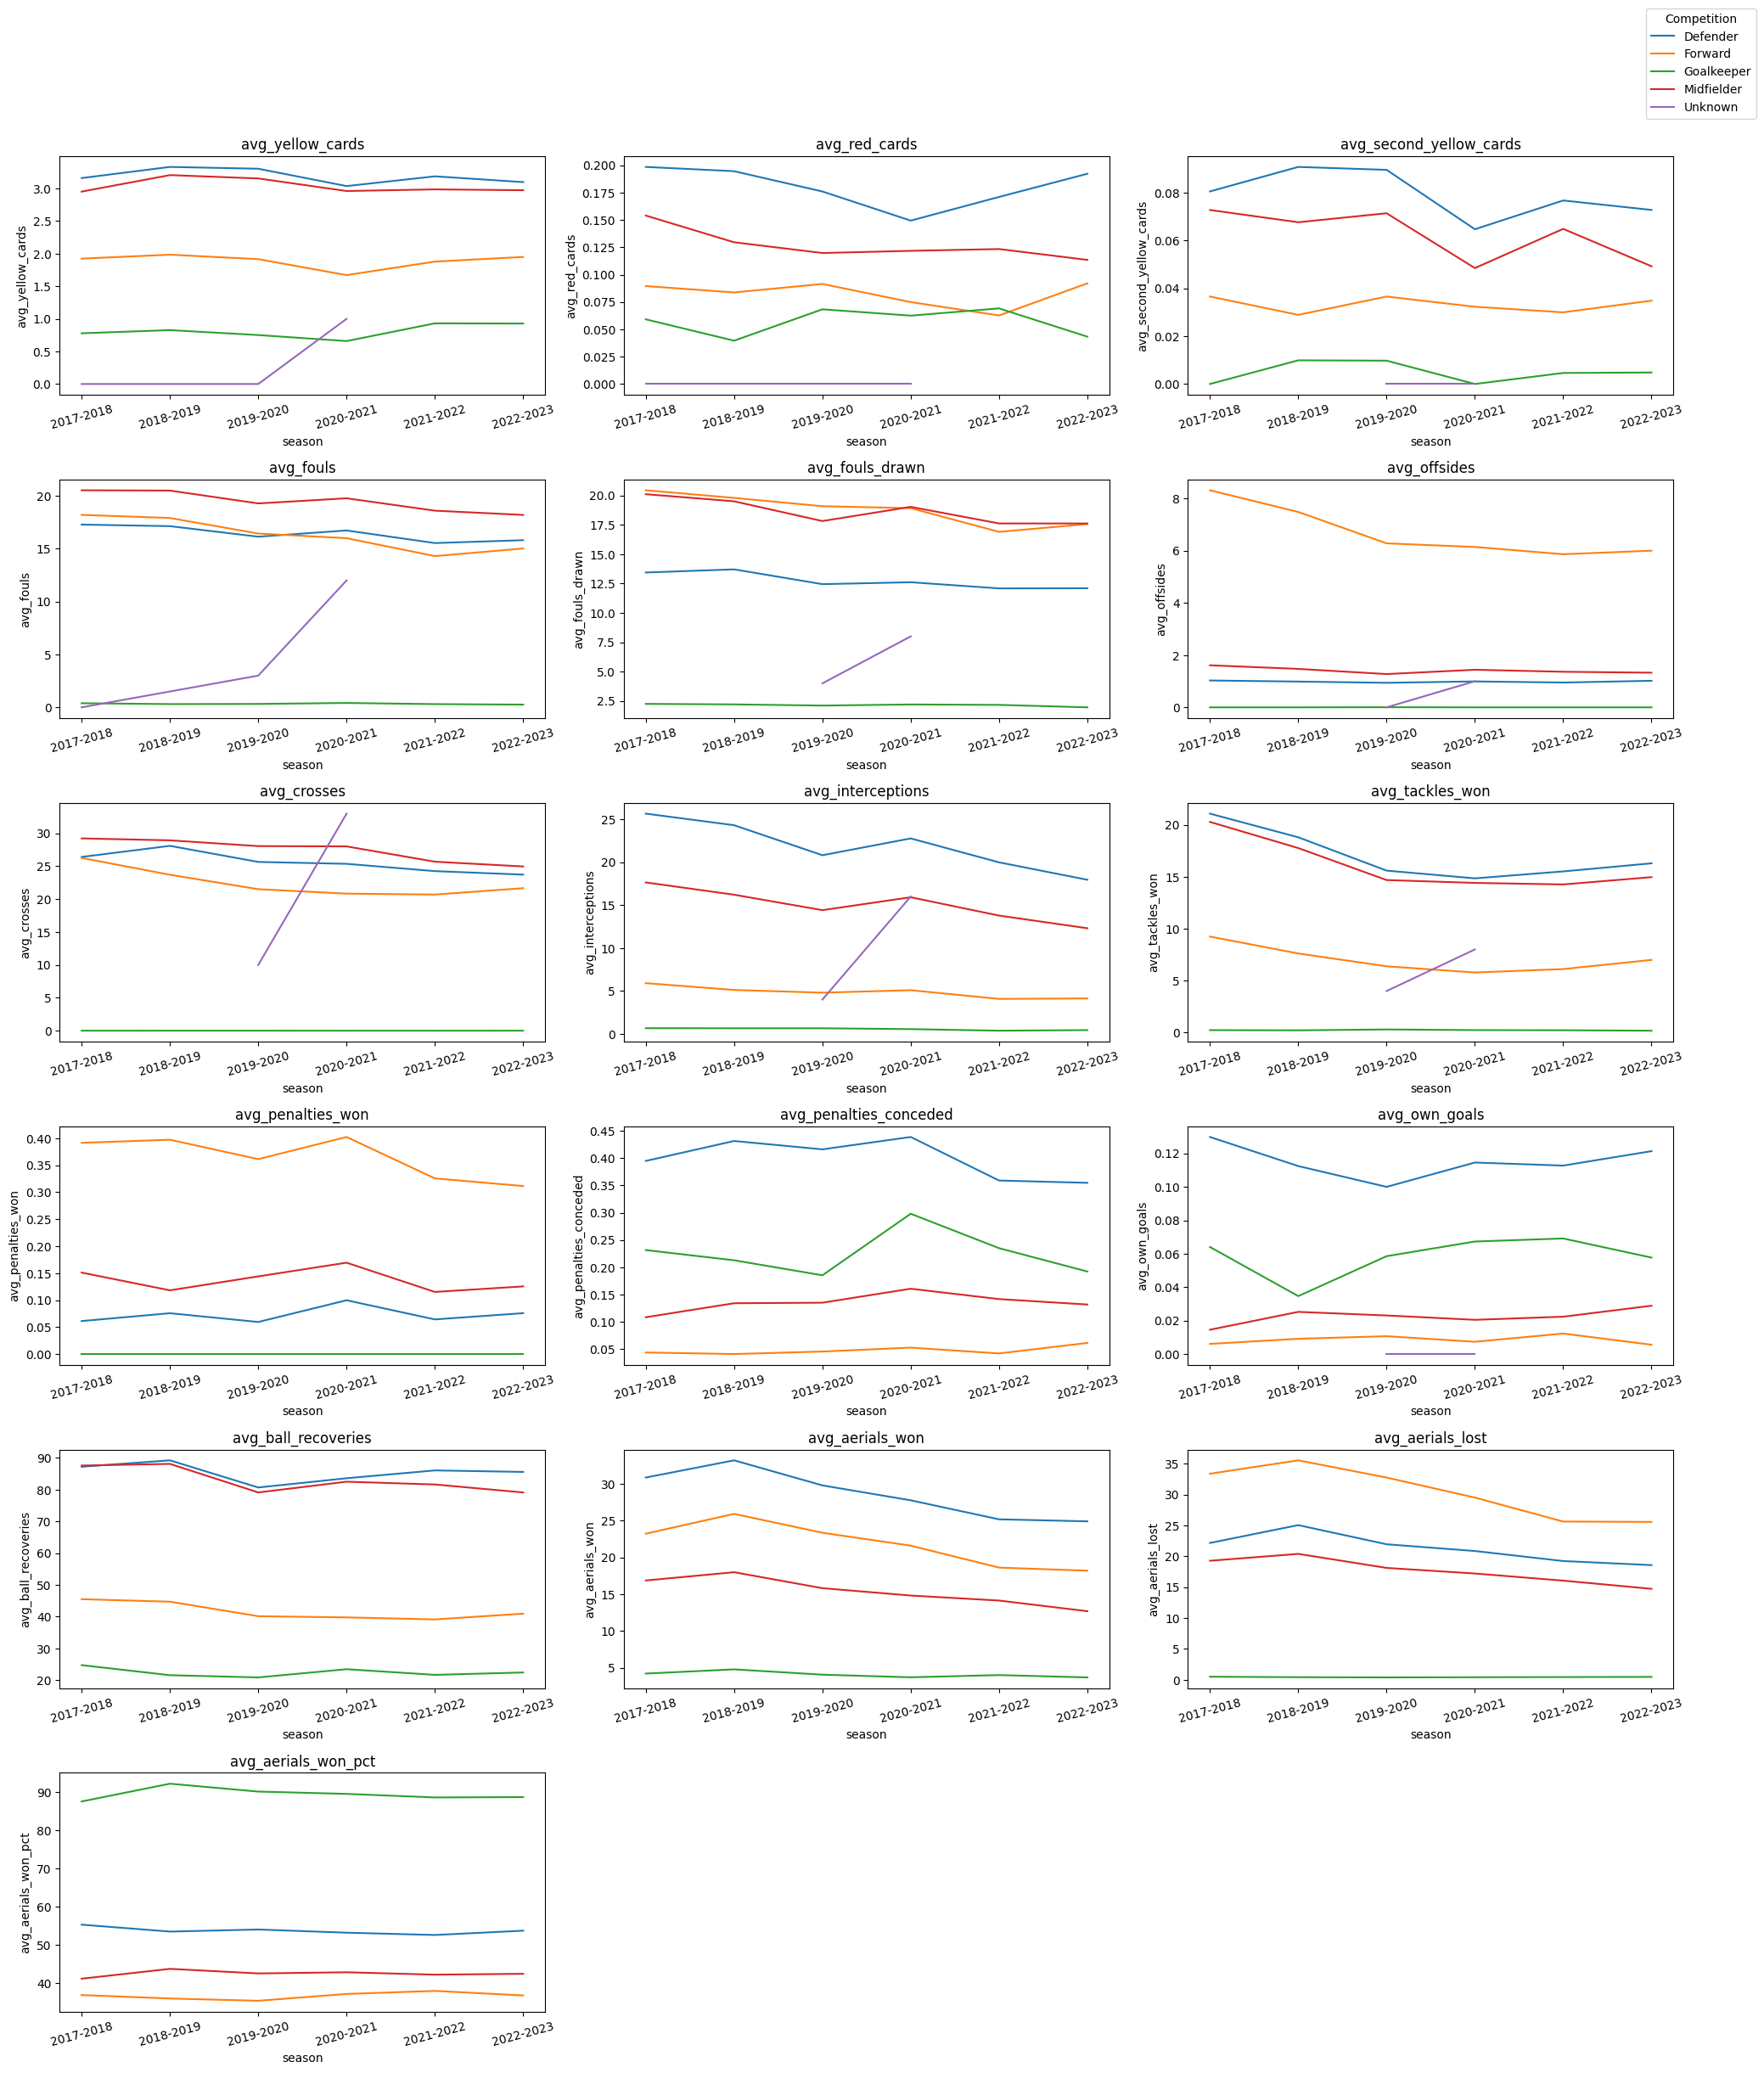

In [13]:
misc_visuals.avgs_time_series('general_pos', cols)

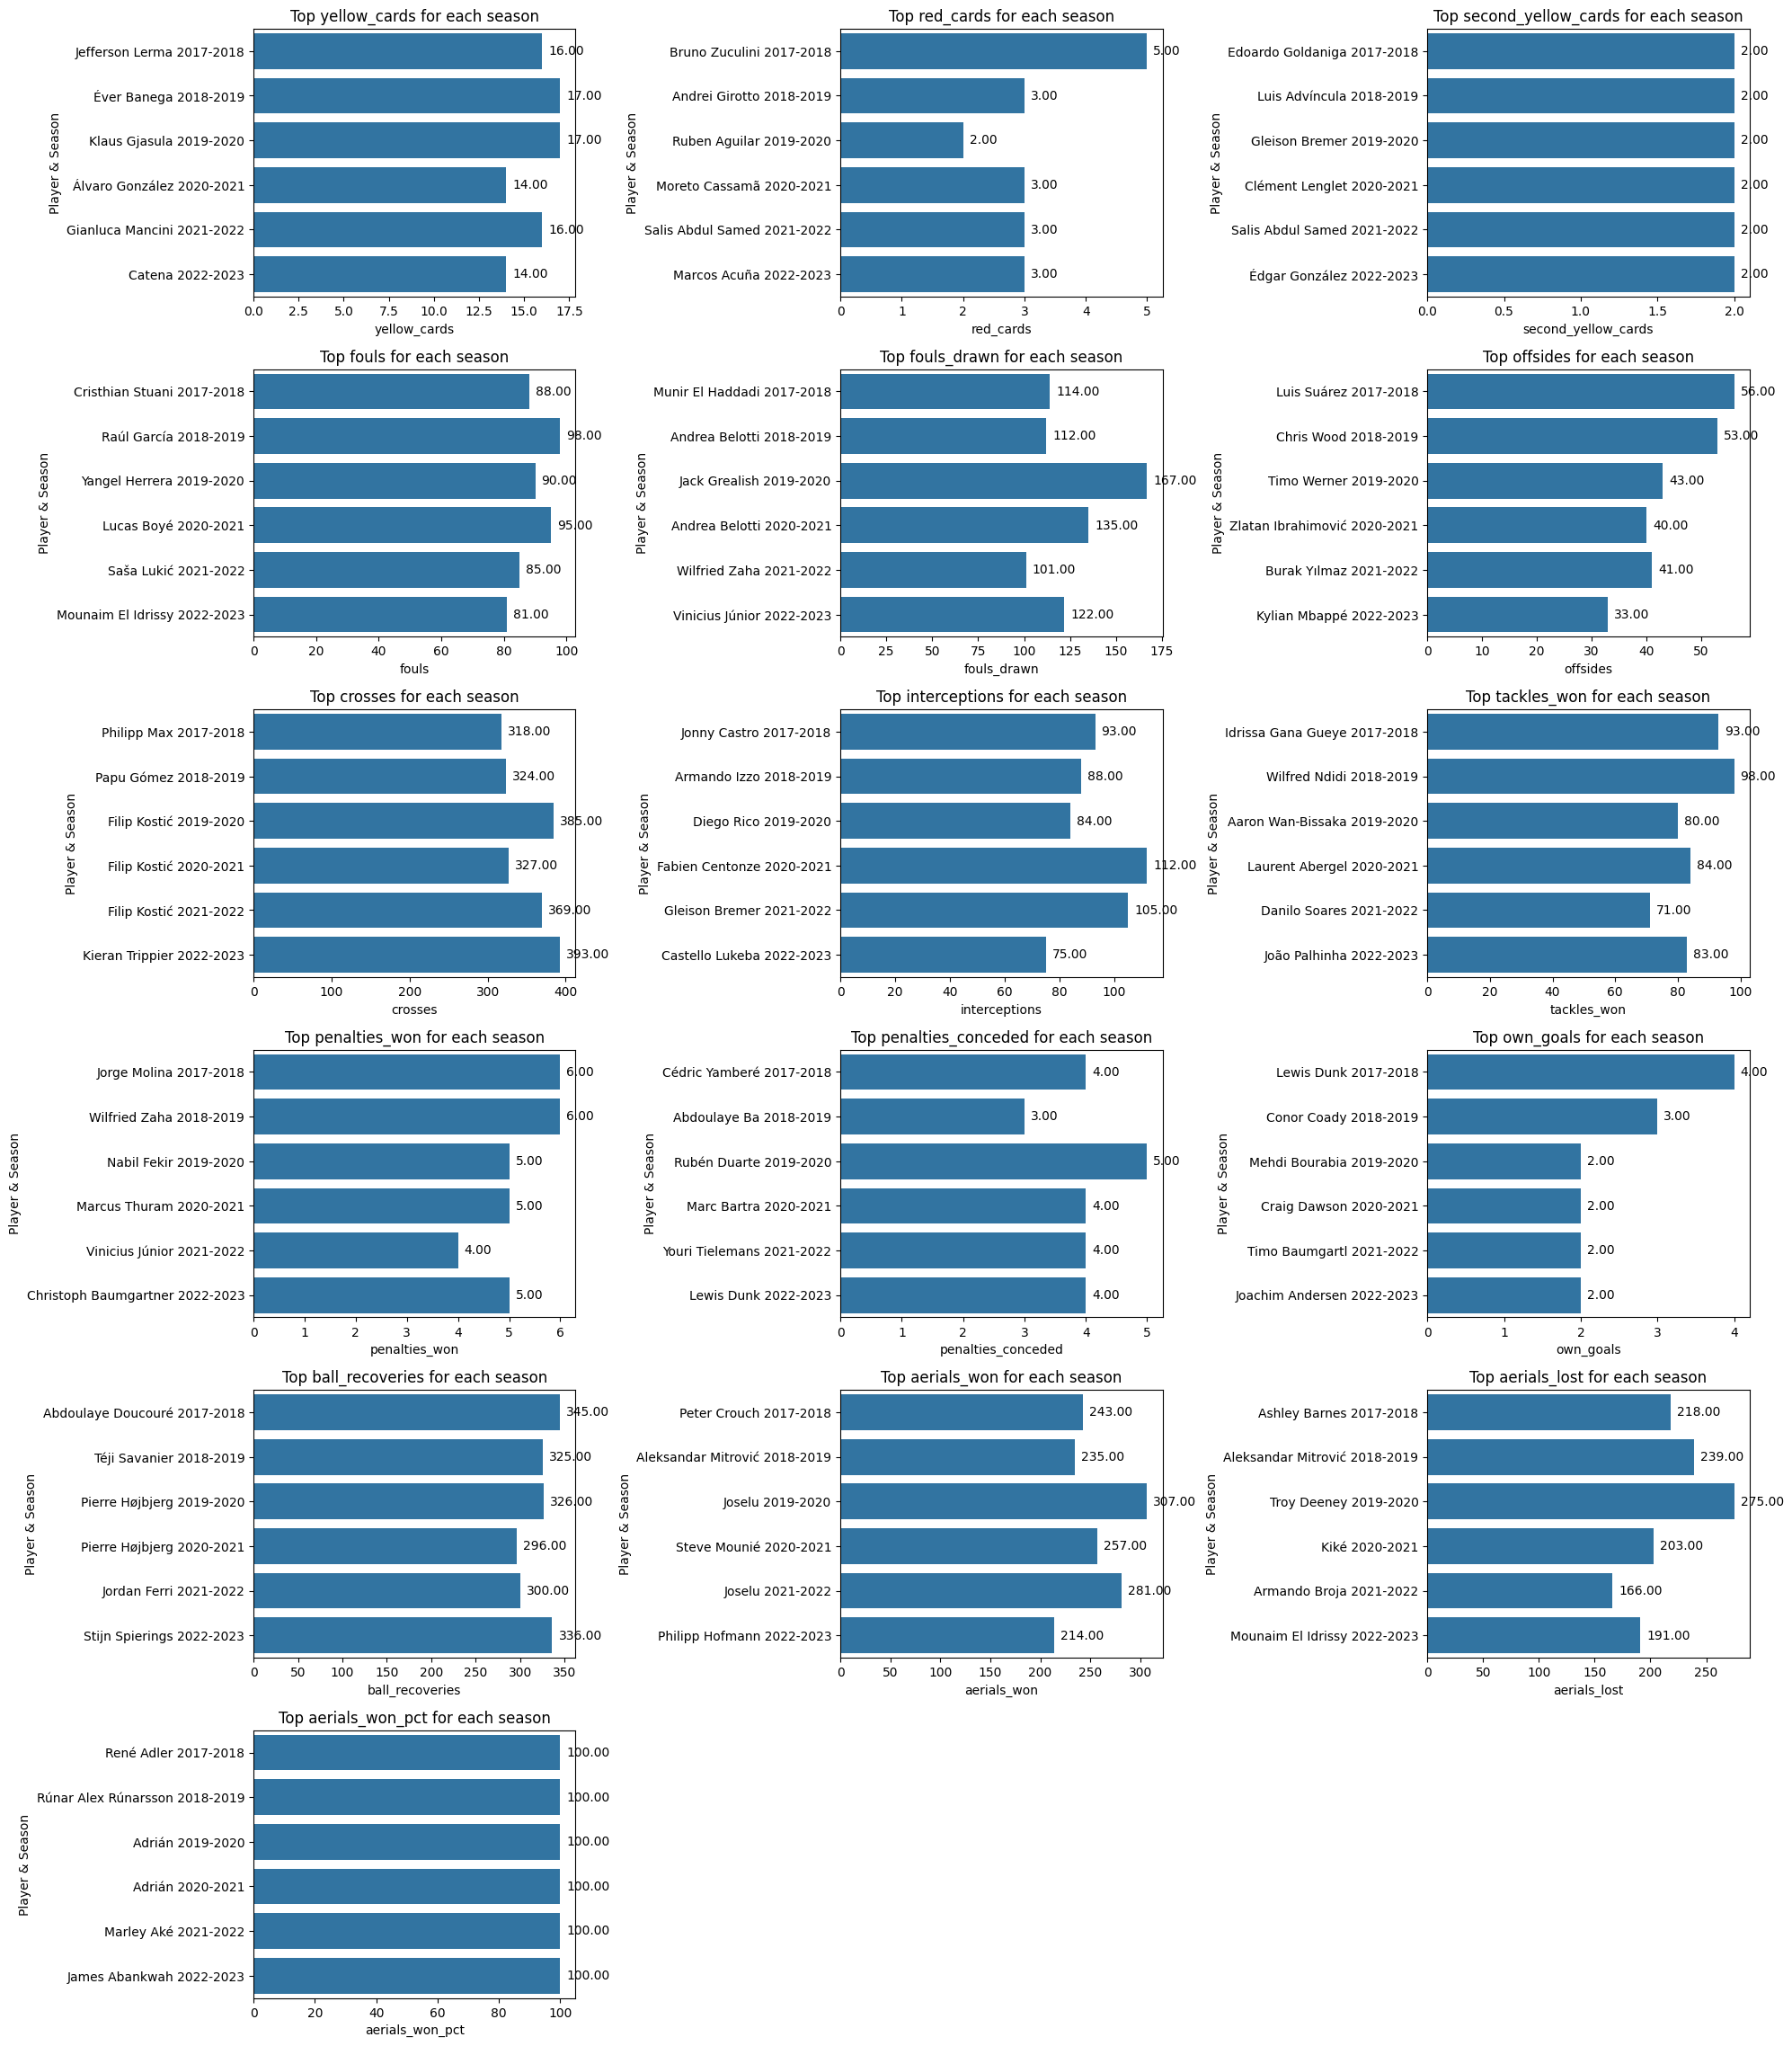

In [14]:
misc_visuals.top_per_season(columns=cols)

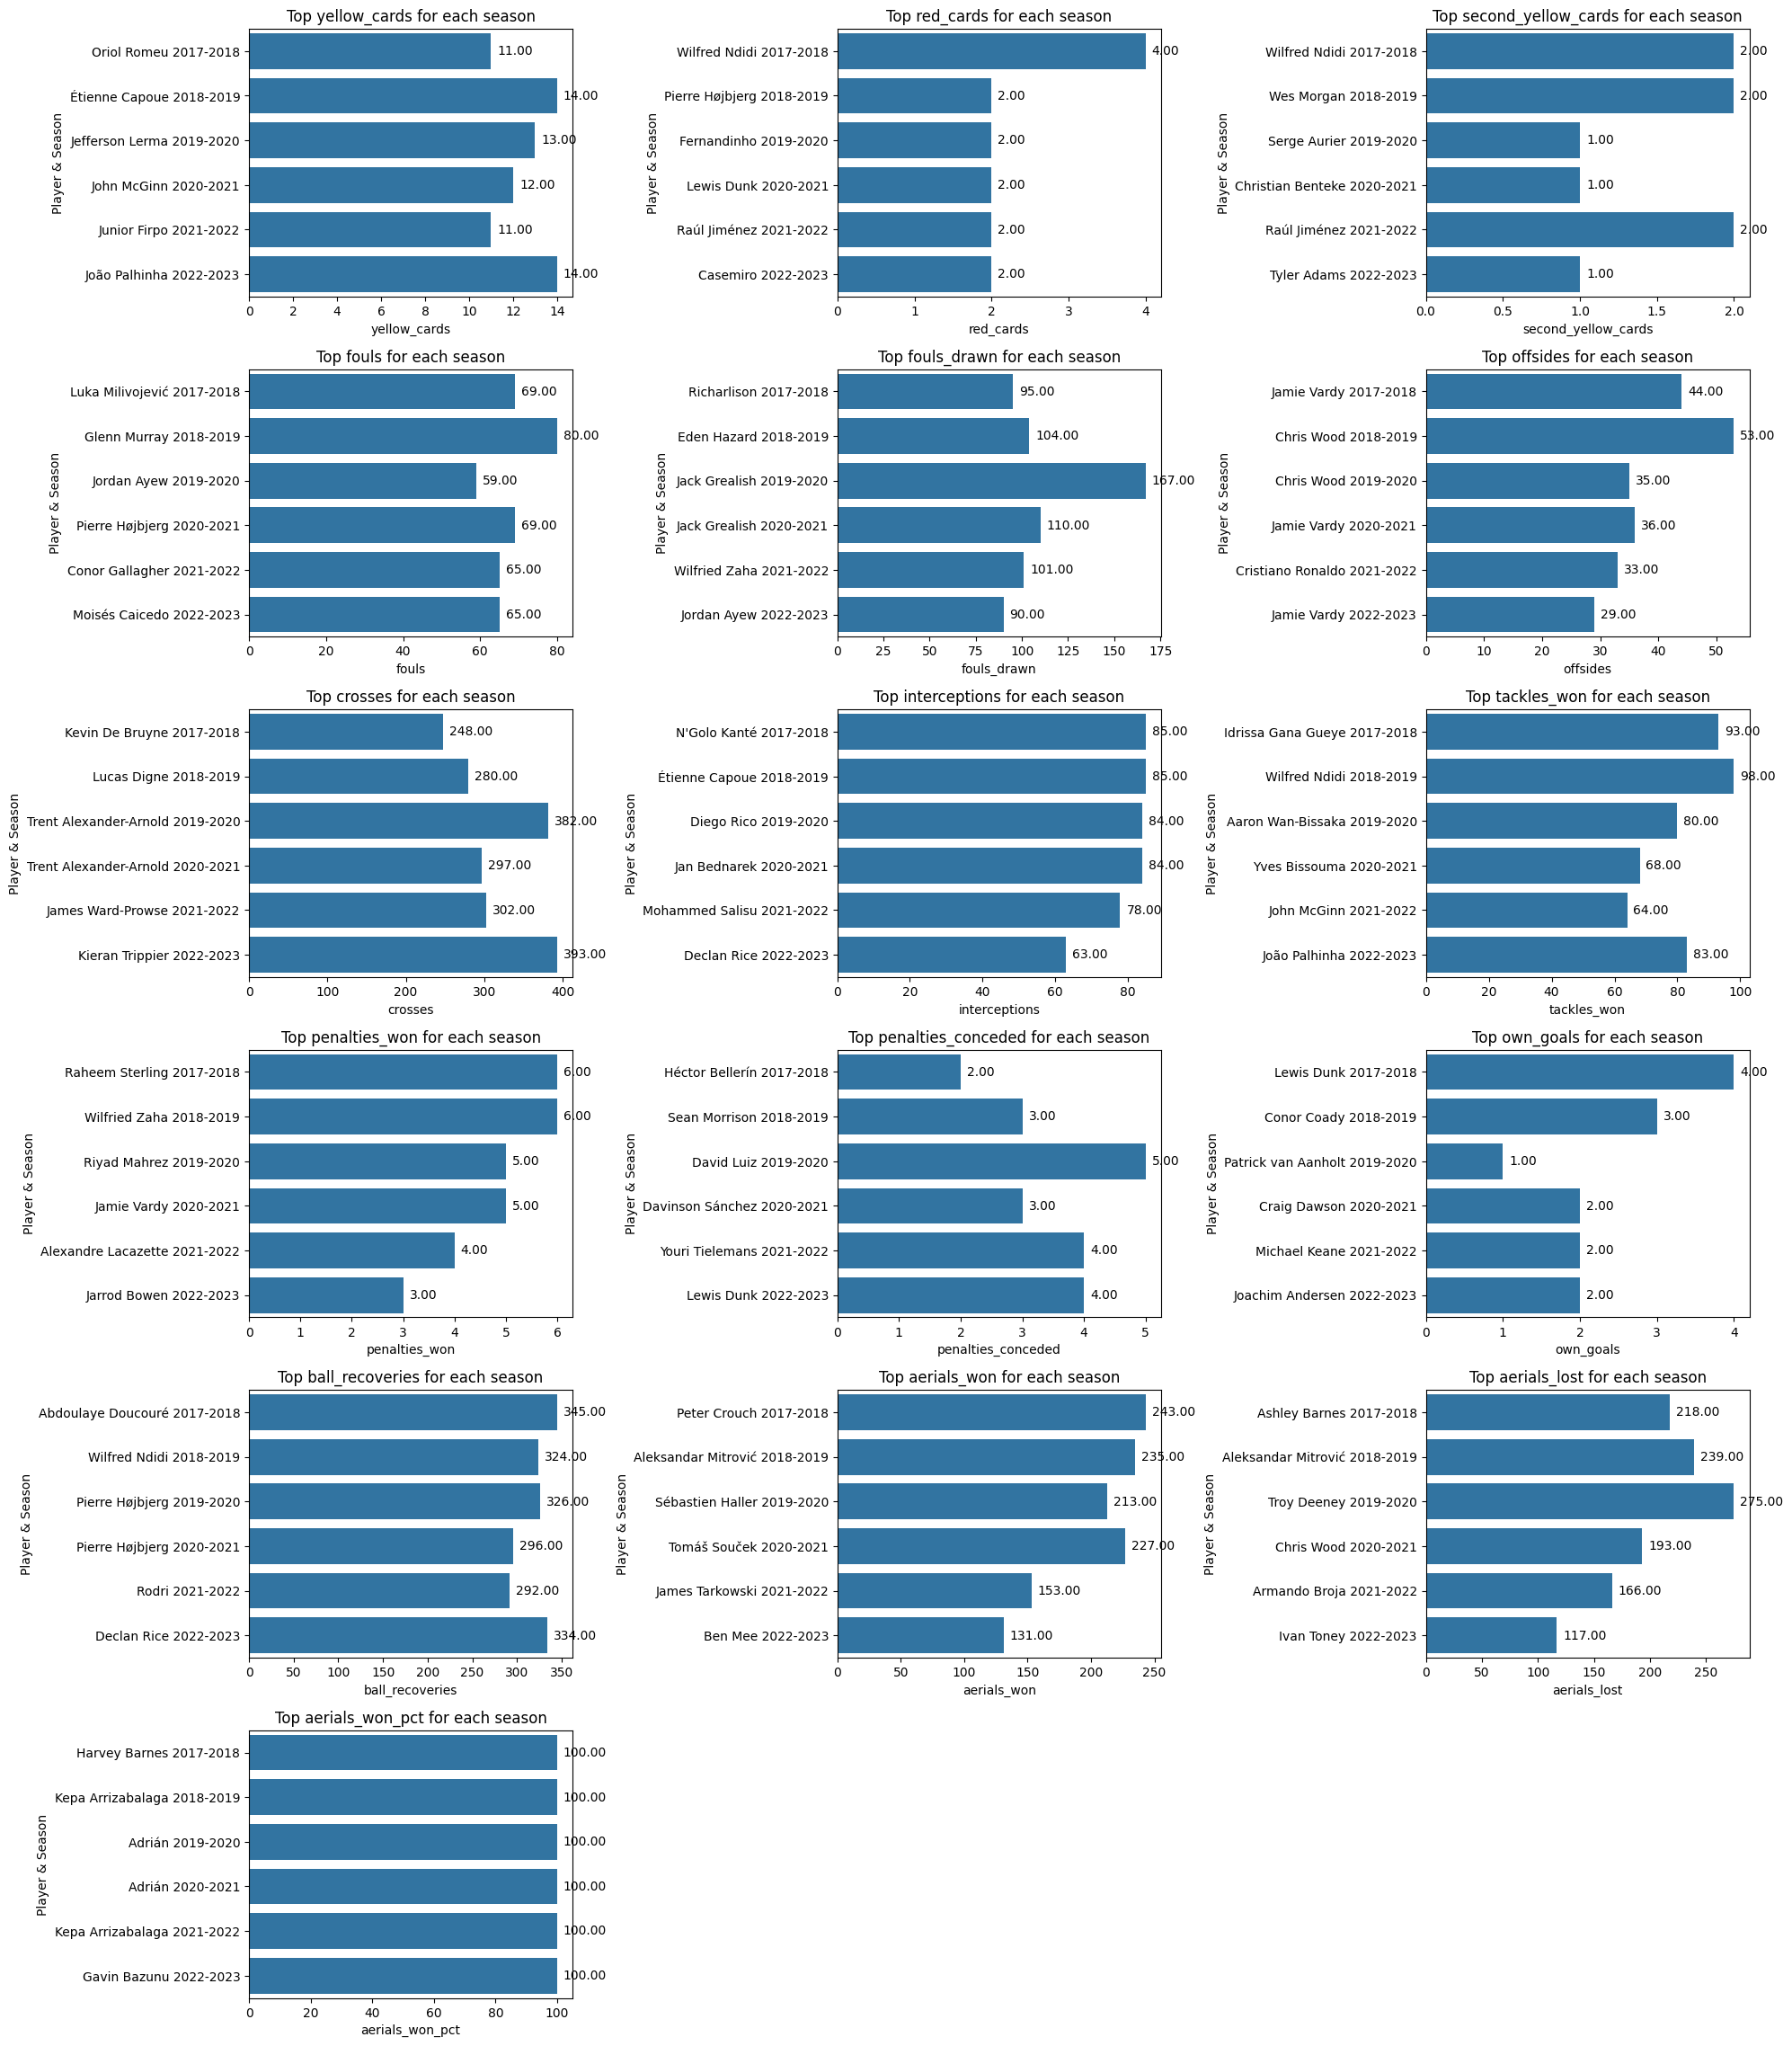

In [15]:
misc_visuals.top_per_season(cols, league='Premier League')

Analyse the 2023-24 season

In [16]:
df_season_2324.head()

rk             player nation pos           squad            comp   age  \
16710   1         Max Aarons    ENG  DF     Bournemouth  Premier League  23.0   
16711   2   Brenden Aaronson    USA  MF    Union Berlin      Bundesliga  23.0   
16712   3    Paxten Aaronson    USA  MF  Eint Frankfurt      Bundesliga  20.0   
16713   4   Yunis Abdelhamid    MAR  DF           Reims         Ligue 1  36.0   
16714   5  Salis Abdul Samed    GHA  MF            Lens         Ligue 1  23.0   

         born   90s  yellow_cards  red_cards  second_yellow_cards  fouls  \
16710  2000.0  11.1             1          0                  0.0     10   
16711  2000.0   3.6             2          1                  1.0      3   
16712  2003.0   1.1             0          0                  0.0      6   
16713  1987.0  16.0             3          0                  0.0     10   
16714  2000.0  13.9             2          0                  0.0     30   

       fouls_drawn  offsides  crosses  interceptions  tackles_won  \
16710         22.0       2.0     10.0            5.0         16.0   
16711          3.0       0.0      8.0            0.0          6.0   
16712          4.0       0.0      0.0            0.0          2.0   
16713          6.0       0.0      1.0           19.0         21.0   
16714         15.0       0.0      3.0            9.0         12.0   

       penalties_won  penalties_conceded  own_goals  ball_recoveries  \
16710            0.0                 1.0        0.0             64.0   
16711            0.0                 0.0        0.0             21.0   
16712            0.0                 0.0        0.0              5.0   
16713            0.0                 0.0        0.0            103.0   
16714            0.0                 3.0        0.0             76.0   

       aerials_won  aerials_lost  aerials_won_pct     season general_pos  \
16710          4.0           9.0             30.8  2023-2024    Defender   
16711          1.0           4.0             20.0  2023-2024  Midfielder   
16712          3.0           0.0            100.0  2023-2024  Midfielder   
16713         27.0          22.0             55.1  2023-2024    Defender   
16714          1.0           6.0             14.3  2023-2024  Midfielder   

      age_range        country      continent  player_id  
16710     20-24        England         Europe       3312  
16711     20-24  United States  North America       5281  
16712     20-24  United States  North America       5282  
16713     35-39        Morocco         Africa       2563  
16714     20-24          Ghana         Africa       4646

In [17]:
stat_plots_2324 = StatisticPlots(df_season_2324)

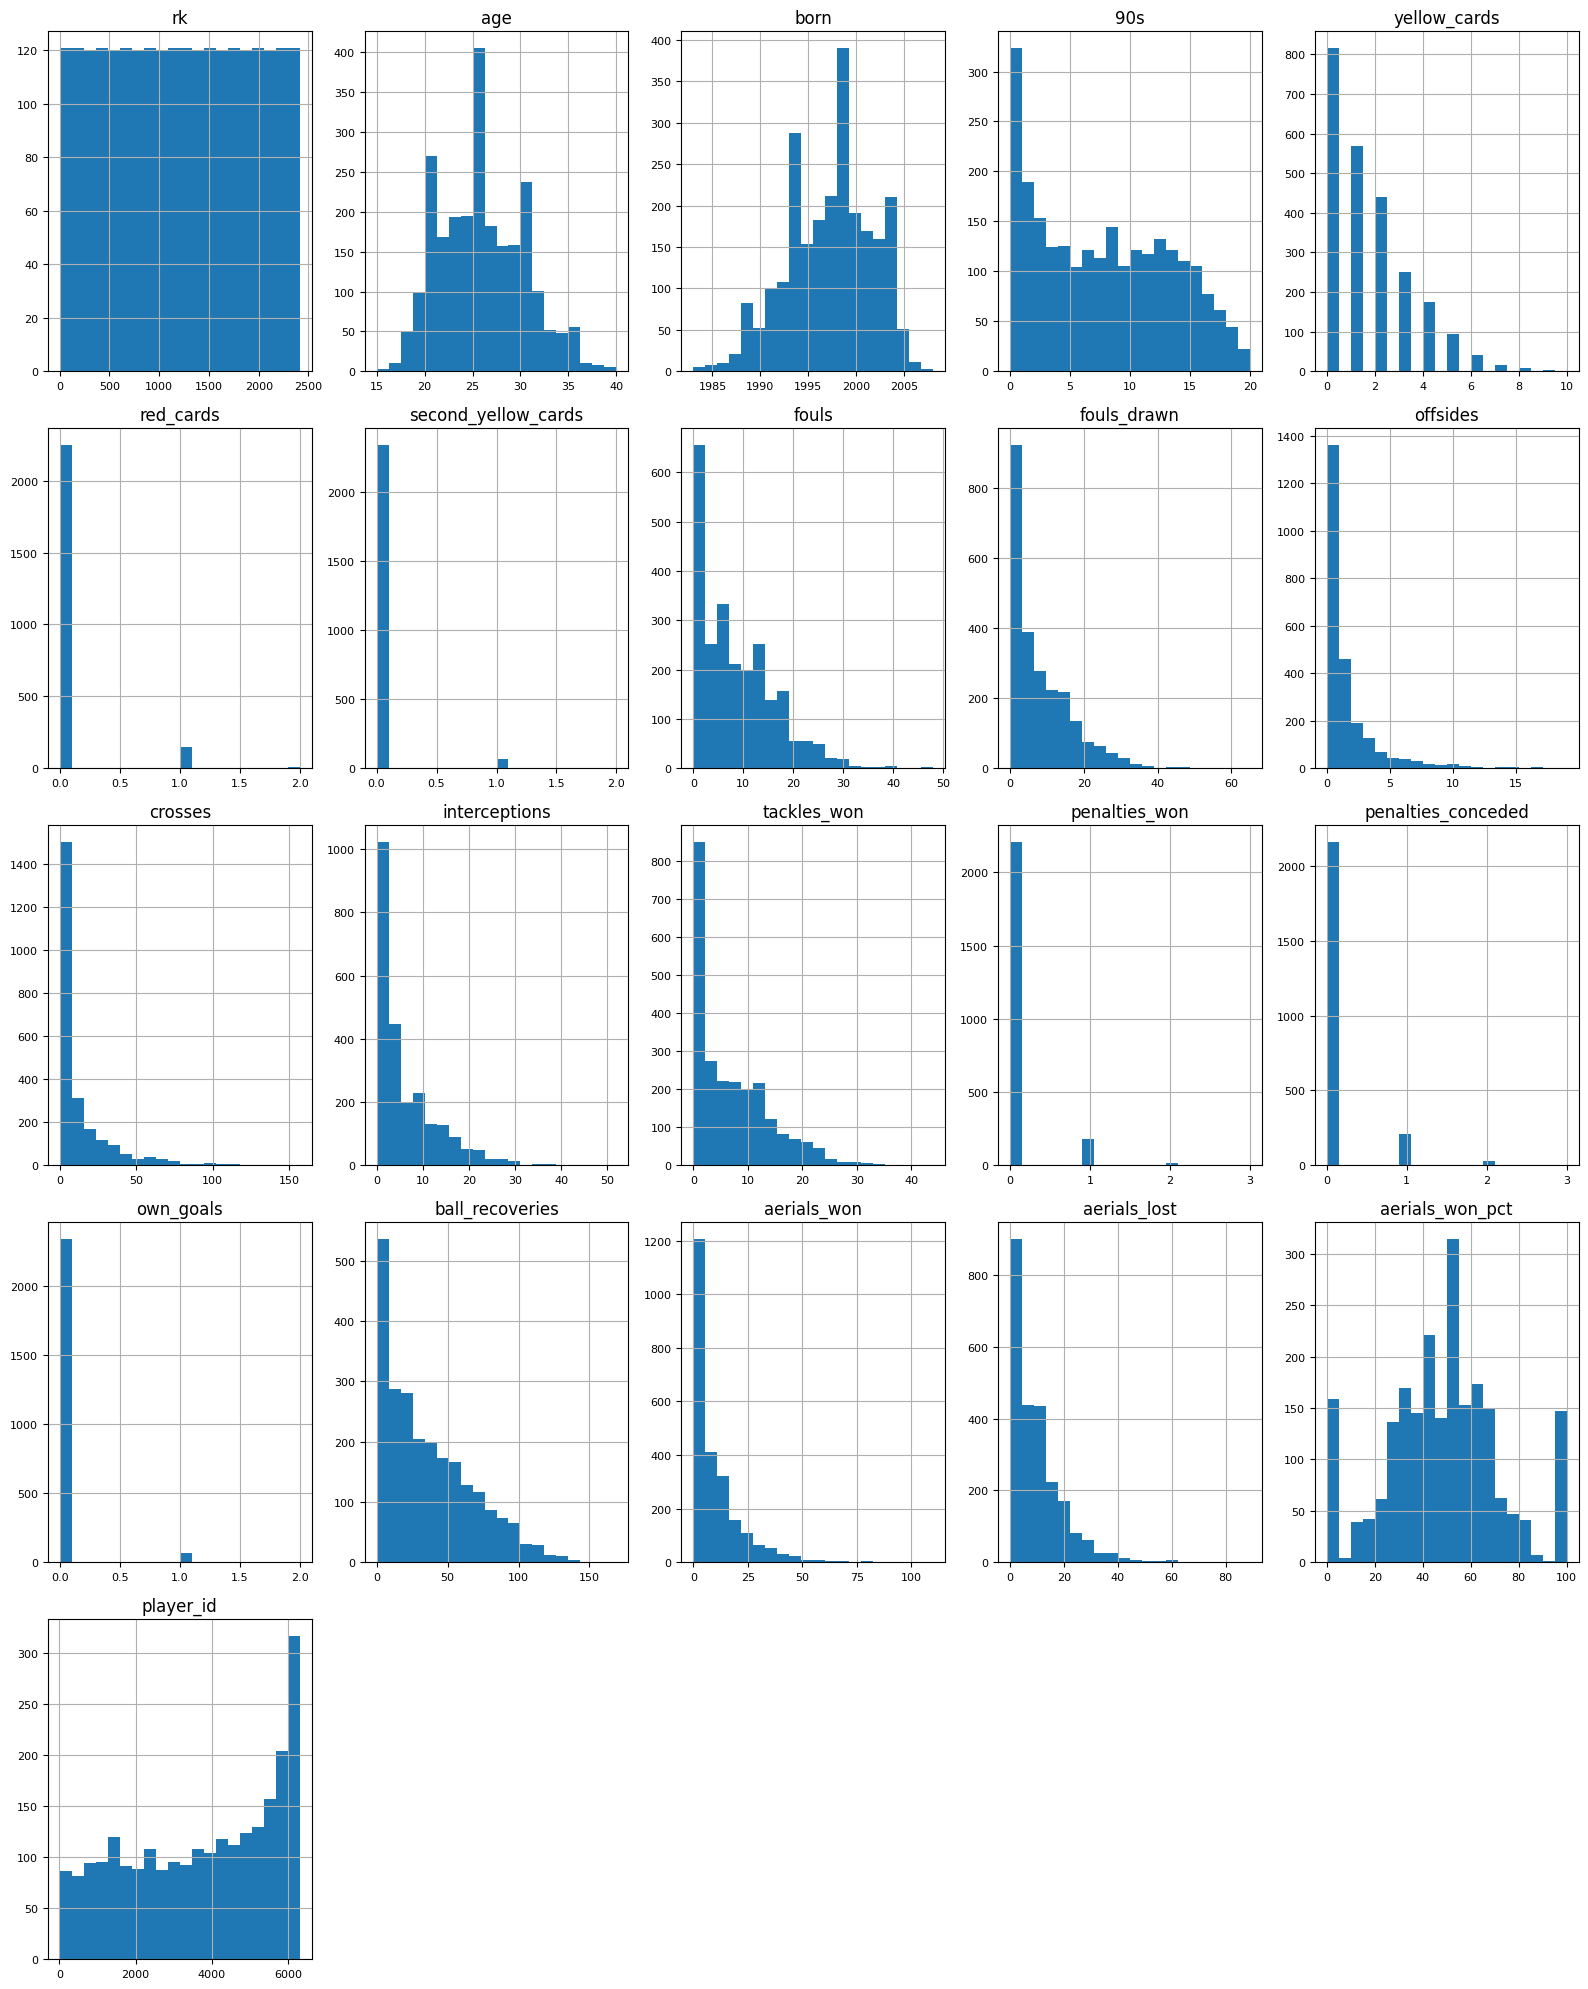

In [18]:
stat_plots_2324.all_distributions()

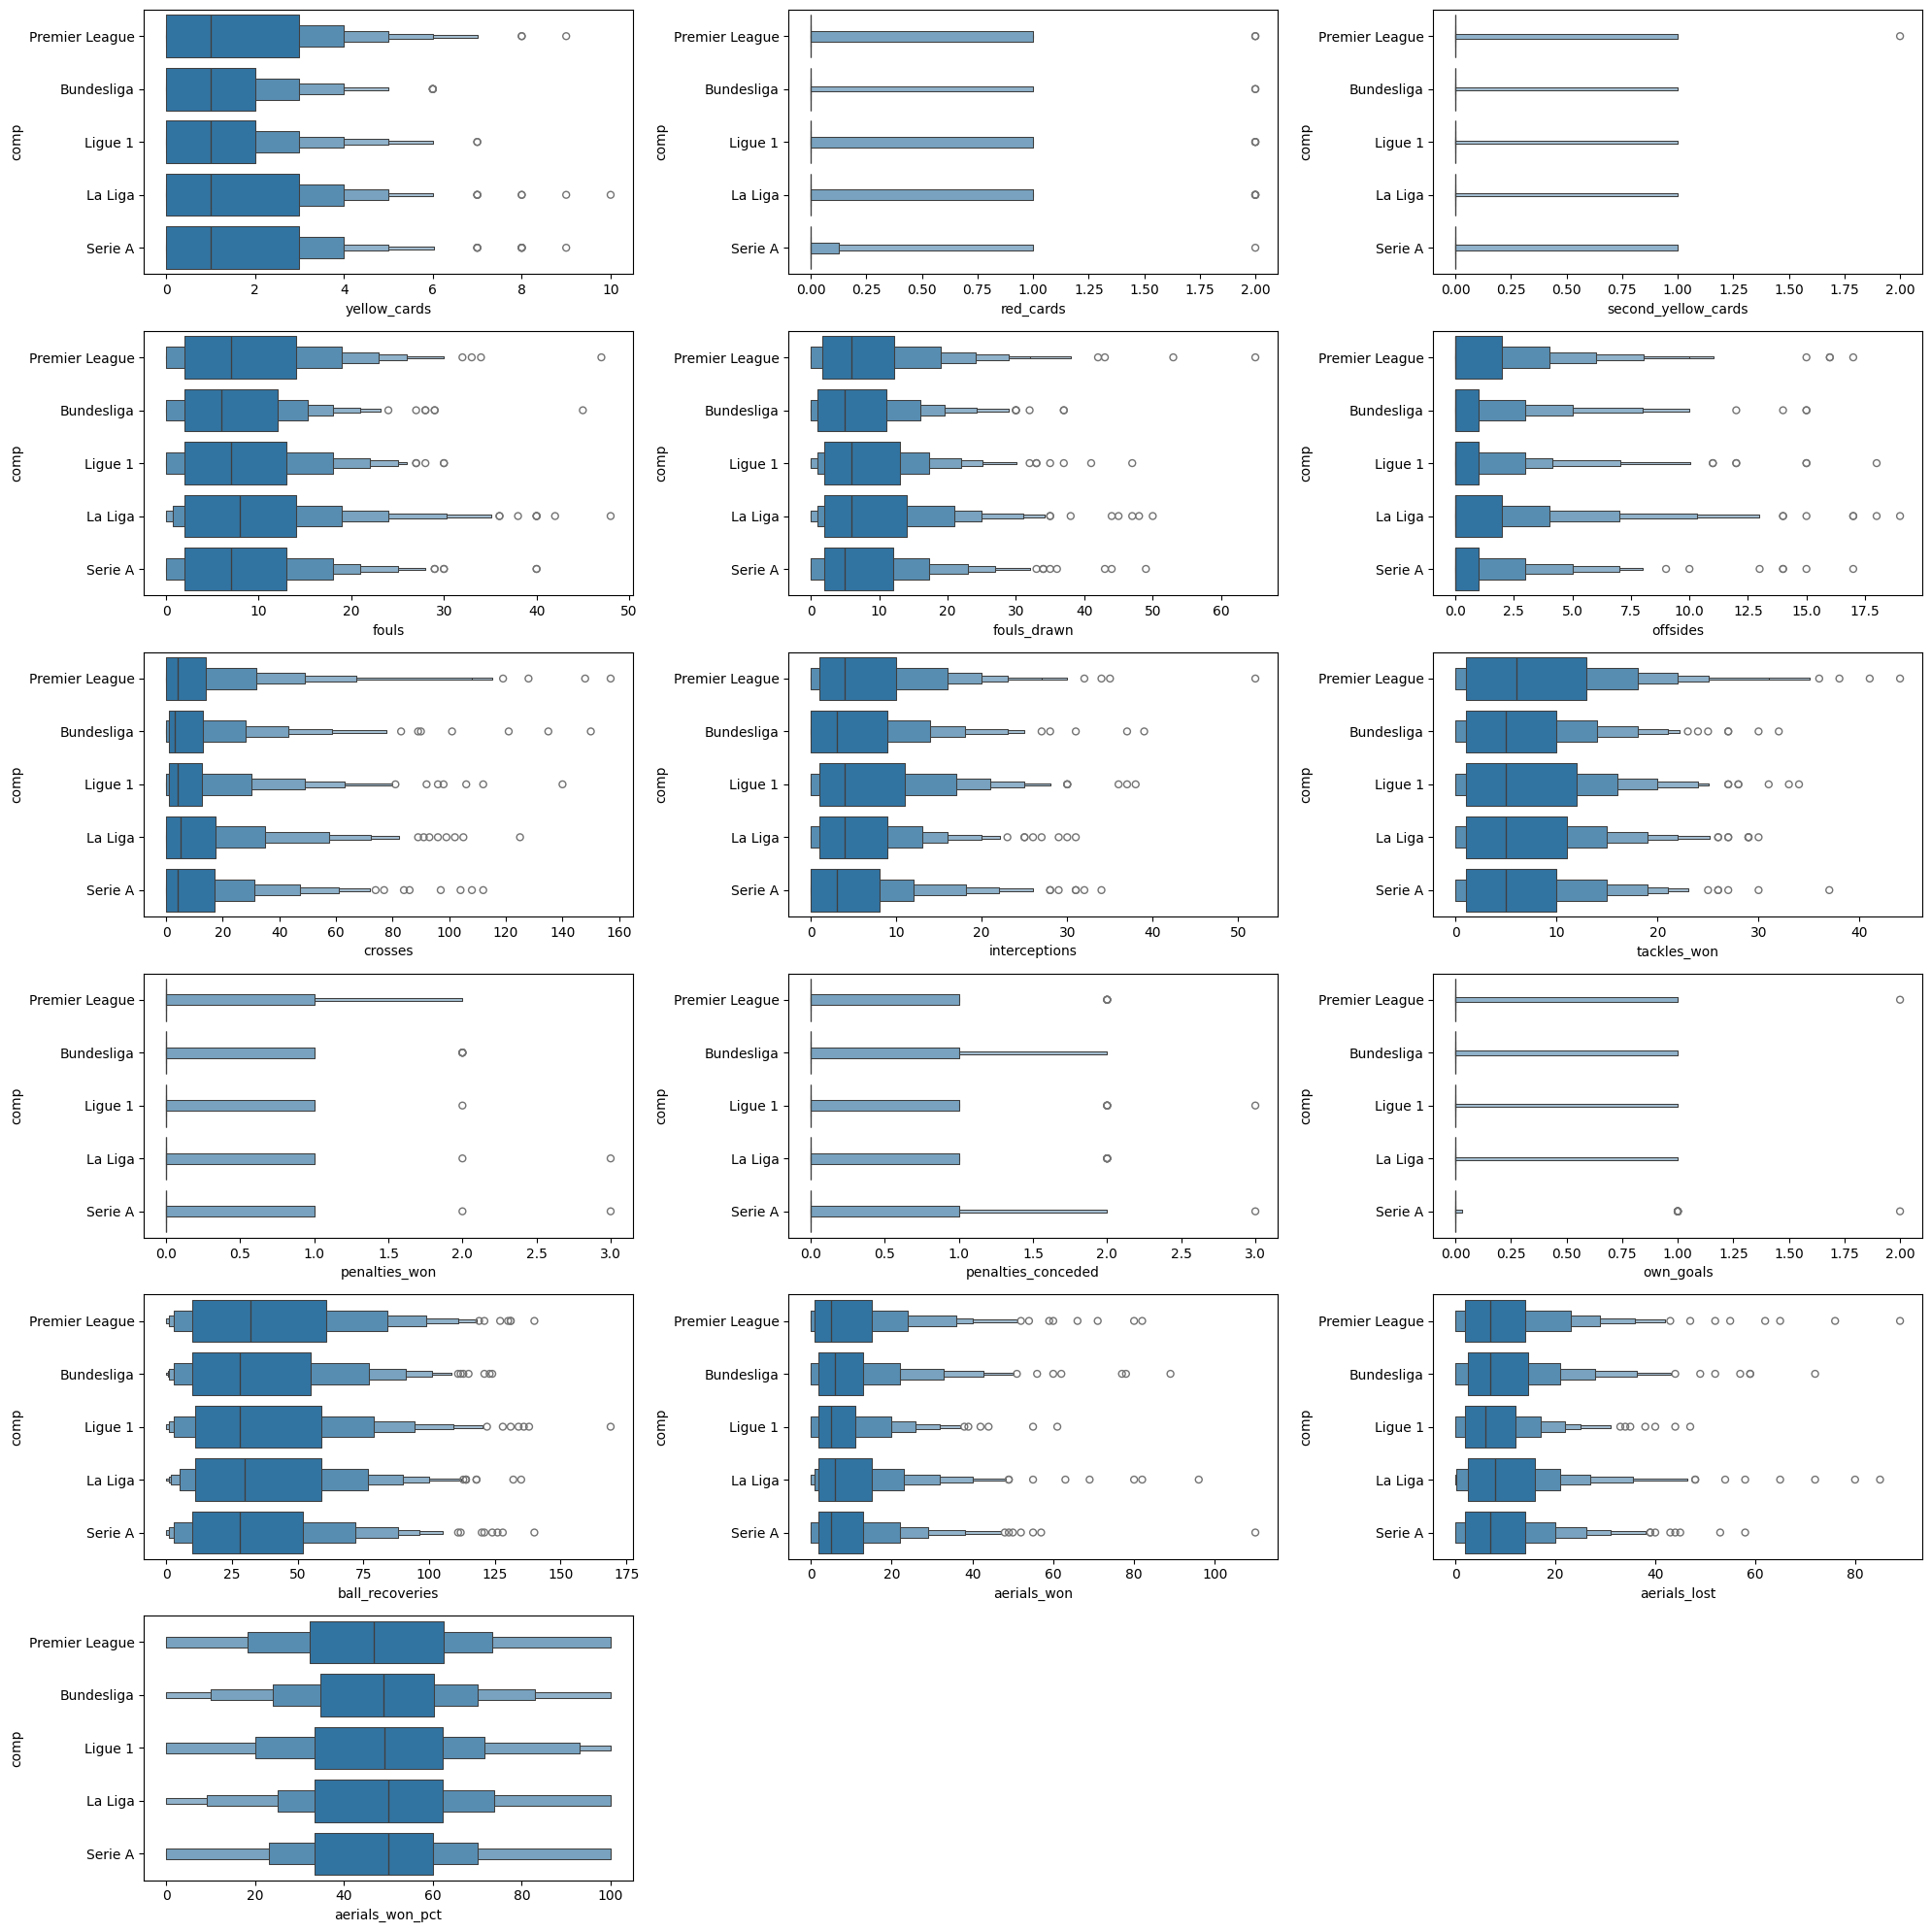

In [19]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 20))

# delete the empty subplots
for i in range(len(cols), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

for stat, ax in zip(cols, axes.flatten()):
    sns.boxenplot(data=df_season_2324, y='comp', x=stat, ax=ax)

plt.tight_layout()

In [20]:
season_2324_visuals = StatsVisuals(df_season_2324)

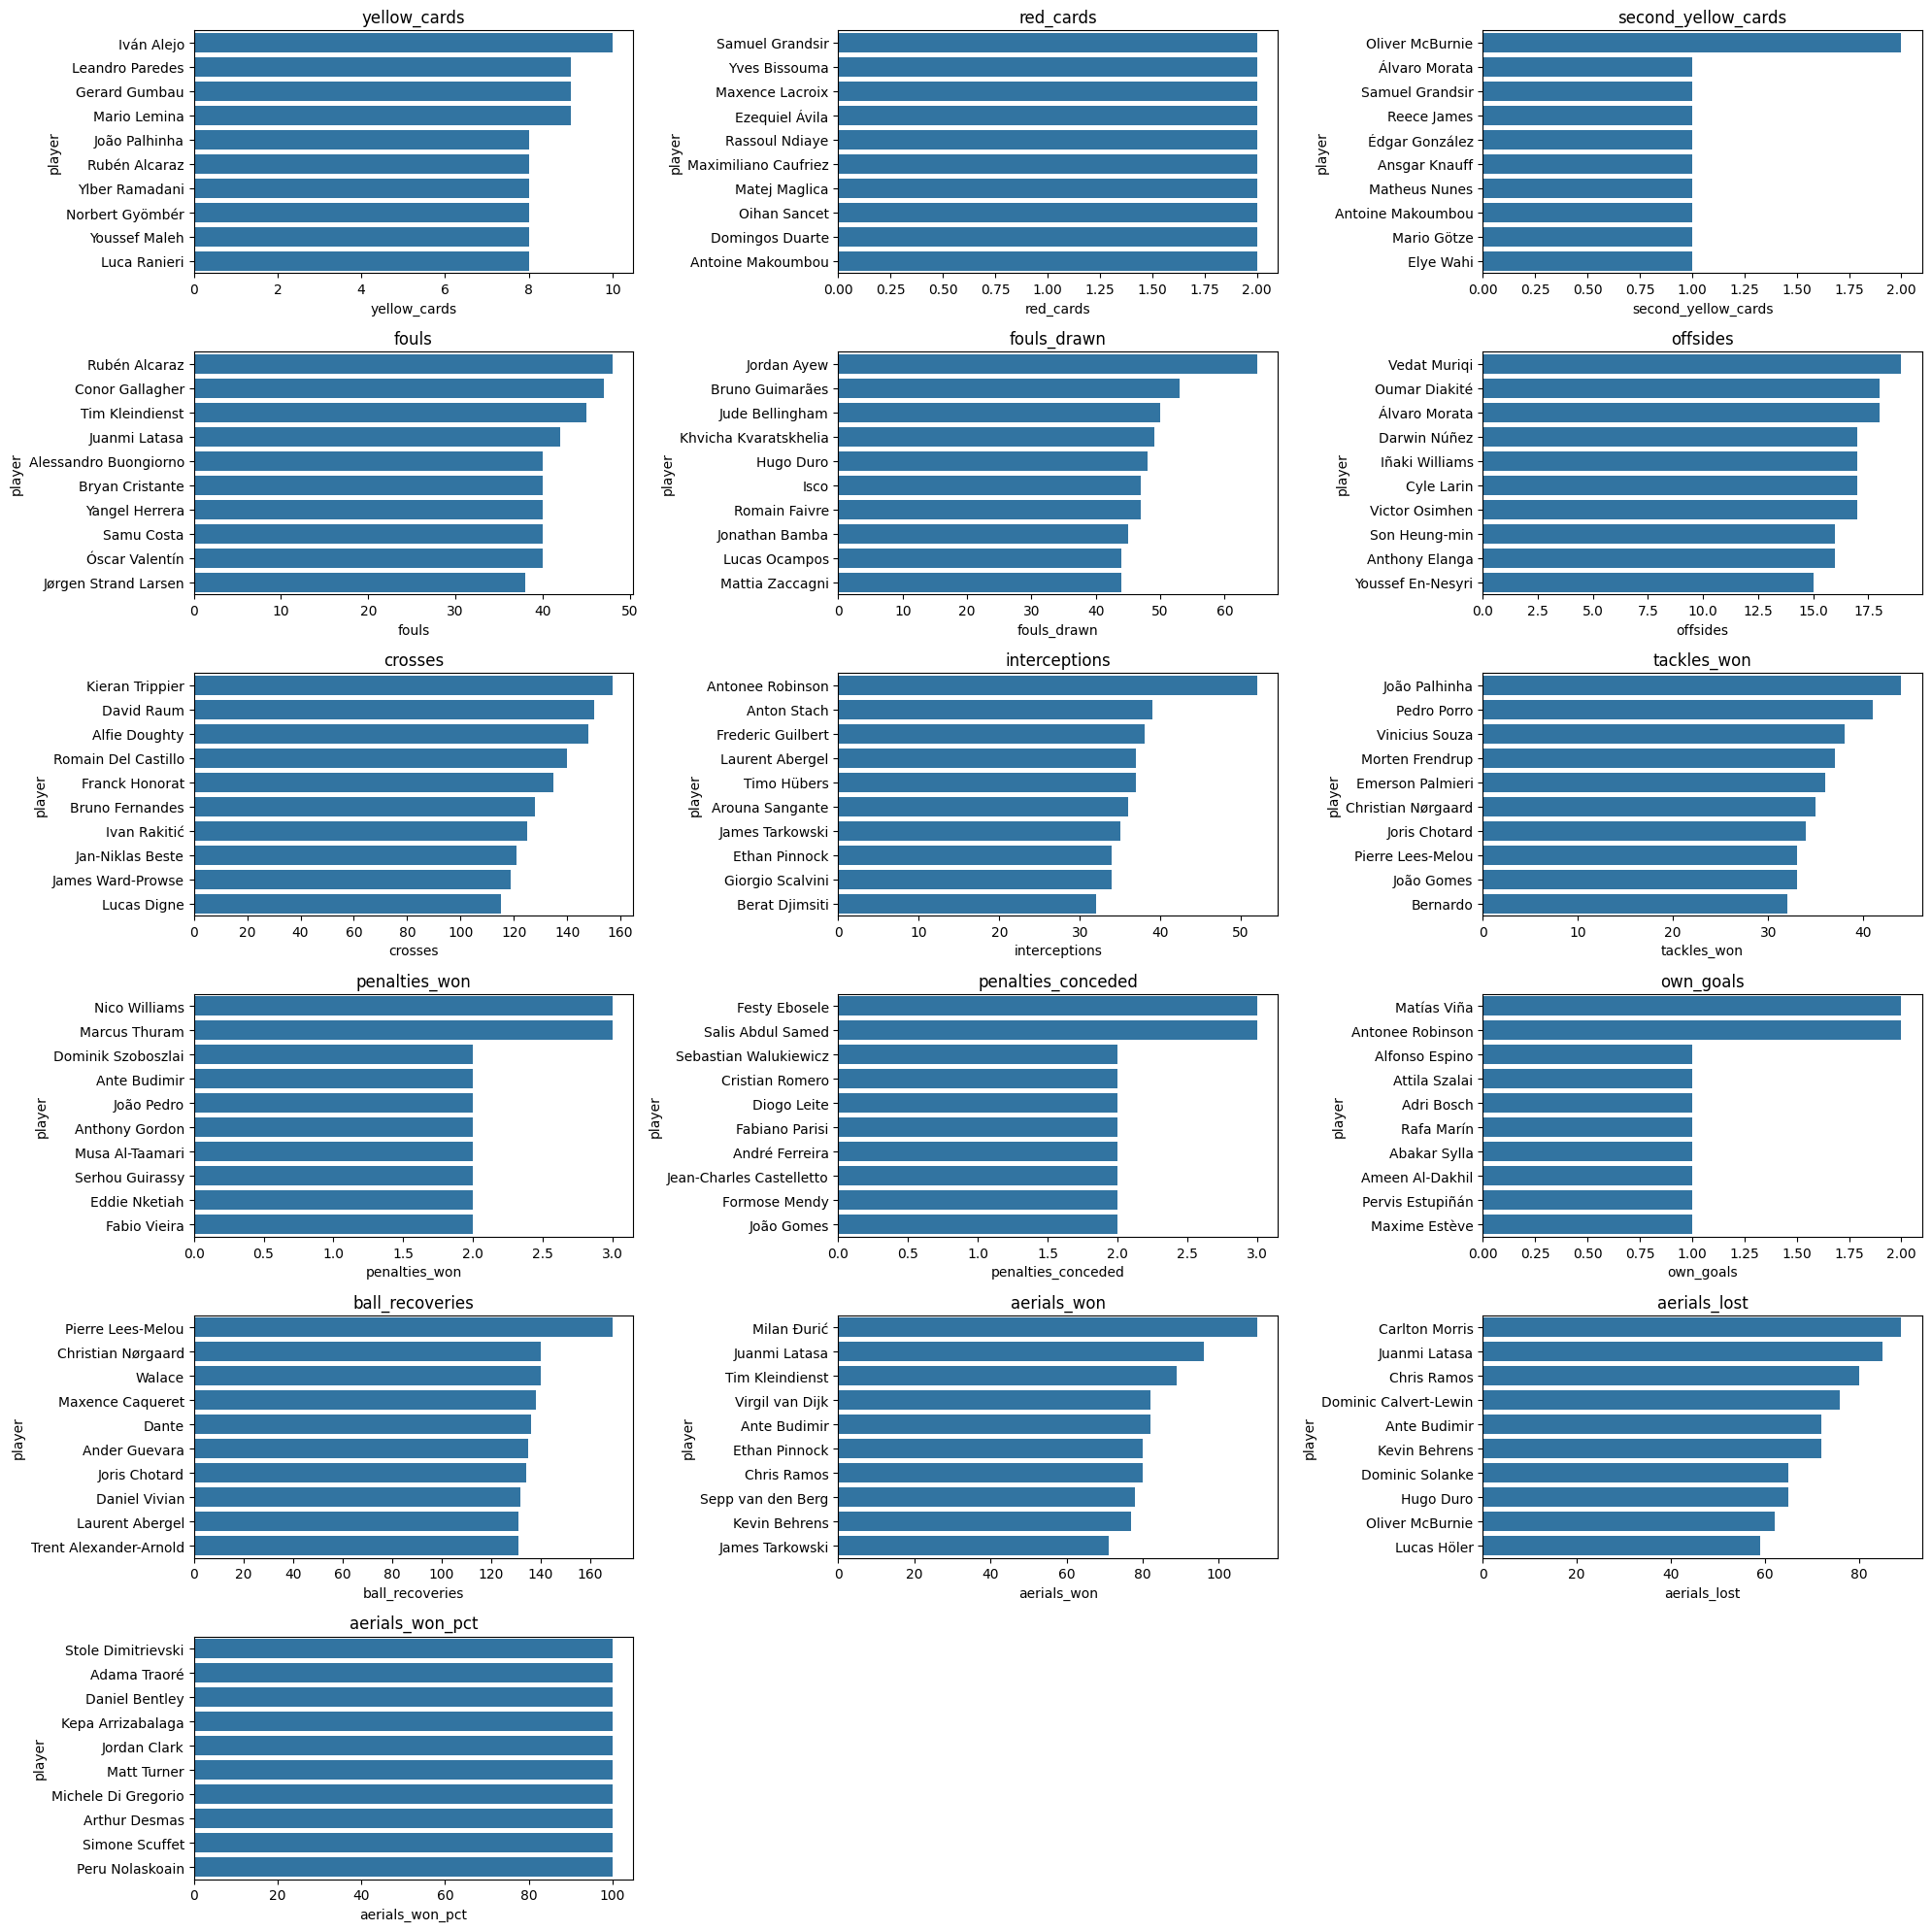

In [21]:
# top 10 for each stat
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 20))

# delete the empty subplots
for i in range(len(cols), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

for stat, ax in zip(cols, axes.flatten()):
    data = df_season_2324.sort_values(stat, ascending=False).head(10)
    sns.barplot(data=data, y='player', x=stat, ax=ax)
    ax.set_title(stat)

plt.tight_layout()